In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset from datasets directory
weightheight = pd.read_csv('~/DevSpace/Data-Snippets/MachineLearning/datasets/weightheight.csv')
weightheight.head()

,Gender,weight_kg,stature_m,body_height
0,Male,81.5,1.776,69.92
1,Male,72.6,1.702,67.01
2,Male,92.9,1.735,68.31
3,Male,79.4,1.655,65.16
4,Male,94.6,1.914,75.35


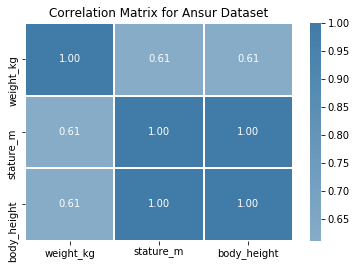

In [3]:
# Spot perfect correlation in data
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(weightheight.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt='.2f')
plt.title('Correlation Matrix for Ansur Dataset')
plt.show()

In [4]:
# Brute force removal of hightly correlated features
abs_corr_matrix = weightheight.corr().abs()

# Upper triagule of corr matrix to false
mask = np.triu(np.ones_like(abs_corr_matrix, dtype=bool))
tri_df = abs_corr_matrix.mask(mask)

# Filter highly correlated dimensions
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.95)]

# Drop highly correlated dimensions
reduced_df = weightheight.drop(to_drop, axis=1)

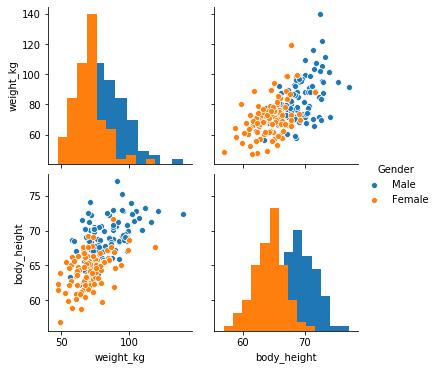

In [5]:
# Check visualization
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')
plt.show()